In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing


In [500]:
df =  pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

df_copy = pd.read_csv('test.csv')

In [501]:
df.head()


,id,age,job,civil,edu,credit,hloan,ploan,ctype,month,...,ccontact,lcdays,pcontact,presult,employment,cprice,cconf,euri3,employees,outcome
0,127087,32,technician,married,university,no,yes,no,cellular,jul,...,7,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
1,104222,27,services,single,9K,no,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,126970,57,services,divorced,unknown,no,no,no,cellular,may,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
3,123366,42,entrepreneur,married,university,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
4,100832,49,technician,married,apprenticeship,no,no,yes,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.958,5228.1,0


In [502]:
df.shape

(28831, 21)

In [503]:
df2.shape


(12357, 20)

In [504]:
df.describe()

,id,age,ccontact,lcdays,pcontact,employment,cprice,cconf,euri3,employees,outcome
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,120599.451042,40.080296,2.574867,962.323124,0.170823,0.081249,93.574302,-40.496743,3.622575,5167.135174,0.111304
std,11872.139828,10.426239,2.780901,187.277267,0.486648,1.572366,0.579193,4.642811,1.733652,72.072751,0.314513
min,100001.000000,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,110316.500000,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,120602.000000,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,130905.500000,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,141188.000000,98.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28831 entries, 0 to 28830
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          28831 non-null  int64  
 1   age         28831 non-null  int64  
 2   job         28831 non-null  object 
 3   civil       28831 non-null  object 
 4   edu         28831 non-null  object 
 5   credit      28831 non-null  object 
 6   hloan       28831 non-null  object 
 7   ploan       28831 non-null  object 
 8   ctype       28831 non-null  object 
 9   month       28831 non-null  object 
 10  day         28831 non-null  object 
 11  ccontact    28831 non-null  int64  
 12  lcdays      28831 non-null  int64  
 13  pcontact    28831 non-null  int64  
 14  presult     28831 non-null  object 
 15  employment  28831 non-null  float64
 16  cprice      28831 non-null  float64
 17  cconf       28831 non-null  float64
 18  euri3       28831 non-null  float64
 19  employees   28831 non-nul

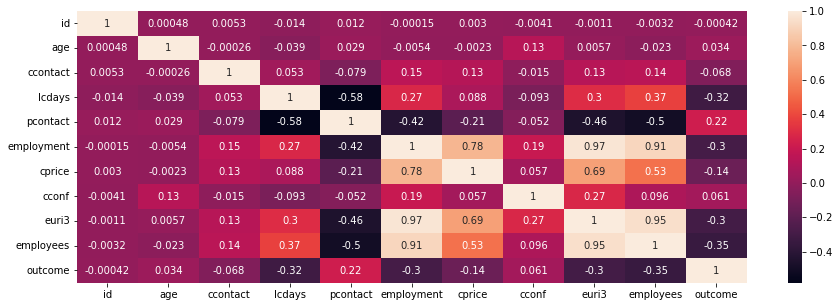

In [506]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,color='Blue')
plt.show()

In [507]:
df.job.value_counts()

admin.          7255
artisan         6540
technician      4668
services        2779
management      2033
retired         1218
selfemployed    1014
entrepreneur    1010
housemaid        759
unemployed       730
student          597
unknown          228
Name: job, dtype: int64

In [508]:
df.civil.value_counts()

married     17512
single       8065
divorced     3198
unknown        56
Name: civil, dtype: int64

In [509]:
np.unique(df.job)

array(['admin.', 'artisan', 'entrepreneur', 'housemaid', 'management',
       'retired', 'selfemployed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

Text(0, 0.5, 'Count')

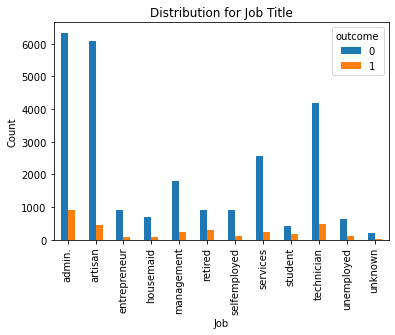

In [510]:
%matplotlib inline
pd.crosstab(df.job,df.outcome).plot(kind='bar')
plt.title('Distribution for Job Title')
plt.xlabel('Job')
plt.ylabel('Count')

In [511]:
np.unique(df.civil)

array(['divorced', 'married', 'single', 'unknown'], dtype=object)

Text(0, 0.5, 'Proportion of Customers')

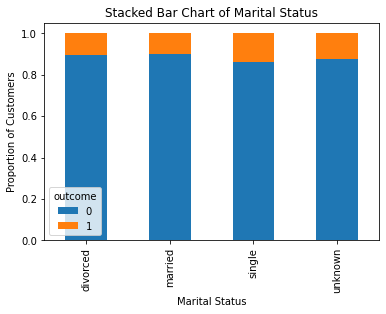

In [512]:
table=pd.crosstab(df.civil,df.outcome)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

In [513]:
df['job'].value_counts()

admin.          7255
artisan         6540
technician      4668
services        2779
management      2033
retired         1218
selfemployed    1014
entrepreneur    1010
housemaid        759
unemployed       730
student          597
unknown          228
Name: job, dtype: int64

In [514]:
df.shape

(28831, 21)

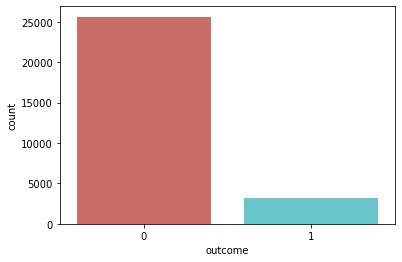

In [515]:
import seaborn as sns
sns.countplot(x='outcome',data=df, palette='hls')
plt.show()

In [516]:
df2.shape

(12357, 20)

In [517]:
df['job'].value_counts()

admin.          7255
artisan         6540
technician      4668
services        2779
management      2033
retired         1218
selfemployed    1014
entrepreneur    1010
housemaid        759
unemployed       730
student          597
unknown          228
Name: job, dtype: int64

In [518]:
df['civil'].value_counts()

married     17512
single       8065
divorced     3198
unknown        56
Name: civil, dtype: int64

In [519]:
df.shape

(28831, 21)

In [520]:
df2.shape

(12357, 20)

In [521]:
df['credit'].value_counts() # drop the credit column in test data too.

no         22767
unknown     6061
yes            3
Name: credit, dtype: int64

In [522]:
df = df.drop('credit',axis=1)

In [523]:
df2 = df2.drop('credit',axis=1) # cleaining on test data

In [524]:
df = df.drop('id',axis=1)

In [525]:
df2 = df2.drop('id',axis=1) # cleaining on test data

In [526]:
df = df.drop('employees',axis=1)

In [527]:
df2 = df2.drop('employees',axis=1) # cleaining on test data

In [528]:
df = df.drop('employment',axis=1)

In [529]:
df2 = df2.drop('employment',axis=1) # cleaining on test data

In [530]:
df = df.drop('euri3',axis=1)

In [531]:
df2 = df2.drop('euri3',axis=1) # cleaining on test data

In [532]:
df.shape

(28831, 16)

In [533]:
df2.shape

(12357, 15)

In [534]:
df['edu'].value_counts()

university        8439
12K               6679
9K                4250
apprenticeship    3656
4K                2982
6K                1602
unknown           1208
illiterate          15
Name: edu, dtype: int64

In [535]:
df.shape

(28831, 16)

In [536]:
df2.shape

(12357, 15)

In [537]:
#Create groups for educations
df['edu'] = np.where(df['edu'] =='4K', 'School', df['edu'])
df['edu'] = np.where(df['edu'] =='6K', 'School', df['edu'])
df['edu'] = np.where(df['edu'] =='9K', 'School', df['edu'])
df['edu'] = np.where(df['edu'] =='12K', 'School', df['edu']) # transform in test data too

In [538]:
#Create groups for educations
df2['edu'] = np.where(df2['edu'] =='4K', 'School', df2['edu'])
df2['edu'] = np.where(df2['edu'] =='6K', 'School', df2['edu'])
df2['edu'] = np.where(df2['edu'] =='9K', 'School', df2['edu'])
df2['edu'] = np.where(df2['edu'] =='12K', 'School', df2['edu']) # transform in test data too

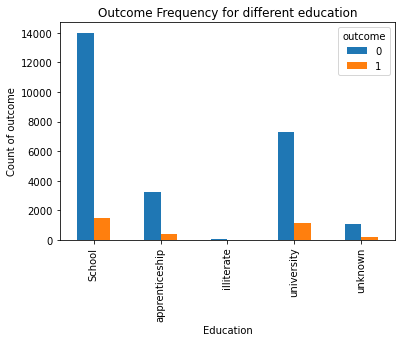

In [539]:
import matplotlib.pyplot as plt

pd.crosstab(df.edu,df.outcome).plot(kind='bar')
plt.title('Outcome Frequency for different education')
plt.xlabel('Education')
plt.ylabel('Count of outcome')
plt.show()

In [540]:
df2.head()

,age,job,civil,edu,hloan,ploan,ctype,month,day,ccontact,lcdays,pcontact,presult,cprice,cconf
0,45,services,married,School,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4
1,41,artisan,married,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4
2,41,artisan,married,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4
3,54,retired,married,School,yes,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4
4,30,unemployed,married,School,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4


In [541]:
df['edu'].value_counts()

School            15513
university         8439
apprenticeship     3656
unknown            1208
illiterate           15
Name: edu, dtype: int64

In [542]:
df.shape

(28831, 16)

In [543]:
df2.shape

(12357, 15)

In [544]:
df['hloan'].value_counts()

yes        15080
no         13088
unknown      663
Name: hloan, dtype: int64

In [545]:
df['ploan'].value_counts()

no         23795
yes         4373
unknown      663
Name: ploan, dtype: int64

In [546]:
df['ctype'].value_counts()

cellular     18283
telephone    10548
Name: ctype, dtype: int64

In [547]:
df['month'].value_counts()

may    9619
jul    5024
aug    4318
jun    3700
nov    2866
apr    1876
oct     505
sep     405
mar     392
dec     126
Name: month, dtype: int64

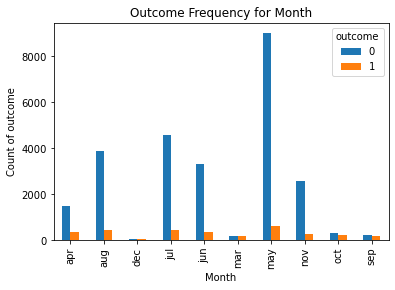

In [548]:
import matplotlib.pyplot as plt

pd.crosstab(df.month,df.outcome).plot(kind='bar')
plt.title('Outcome Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Count of outcome')
plt.show()

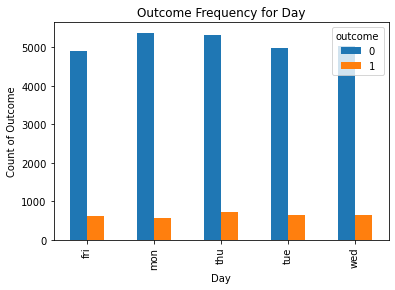

In [549]:
import matplotlib.pyplot as plt

pd.crosstab(df.day,df.outcome).plot(kind='bar')
plt.title('Outcome Frequency for Day')
plt.xlabel('Day')
plt.ylabel('Count of Outcome')
plt.show()

In [550]:
#Month and day have low impact, hence drop them
#df = df.drop(['month','day'],axis=1)

In [551]:
df.shape

(28831, 16)

In [552]:
#df2 = df2.drop(['month','day'],axis=1)

In [553]:
df2.shape

(12357, 15)

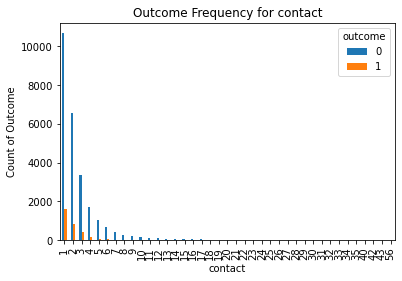

In [554]:
pd.crosstab(df.ccontact,df.outcome).plot(kind='bar')
plt.title('Outcome Frequency for contact')
plt.xlabel('contact')
plt.ylabel('Count of Outcome')
plt.show()

Text(0, 0.5, 'Frequency')

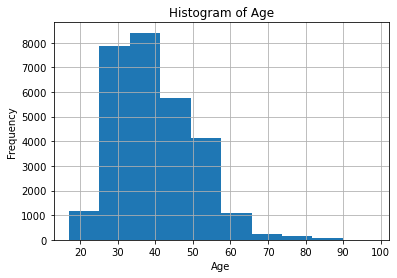

In [555]:
df.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [556]:
df.shape

(28831, 16)

In [557]:
df2.shape

(12357, 15)

In [558]:
#replace 999 with 0
df['lcdays'].value_counts()

999    27766
3        299
6        291
4         78
9         45
7         45
12        43
10        40
5         39
2         38
13        30
11        21
1         15
15        15
14        14
0         13
8         13
16         7
17         6
18         5
19         2
21         2
22         2
27         1
26         1
Name: lcdays, dtype: int64

In [559]:
df['lcdays'] = df['lcdays'].replace(999, 0)

In [560]:
df.shape

(28831, 16)

In [561]:
df2['lcdays'] = df2['lcdays'].replace(999, 0)

In [562]:
df2.shape

(12357, 15)

In [563]:
df['pcontact'].value_counts()

0    24910
1     3192
2      527
3      145
4       44
5       11
7        1
6        1
Name: pcontact, dtype: int64

In [564]:
df['presult'].value_counts()

nonexistent    24910
failure         2959
success          962
Name: presult, dtype: int64

In [565]:
#df['employment'].value_counts()

In [566]:
df['cprice']

0        93.918
1        93.994
2        92.893
3        93.994
4        94.465
          ...  
28826    92.893
28827    93.444
28828    93.918
28829    93.918
28830    93.444
Name: cprice, Length: 28831, dtype: float64

In [567]:
df['cconf']

0       -42.7
1       -36.4
2       -46.2
3       -36.4
4       -41.8
         ... 
28826   -46.2
28827   -36.1
28828   -42.7
28829   -42.7
28830   -36.1
Name: cconf, Length: 28831, dtype: float64

In [568]:
df[['cprice','cconf','outcome']].corr()

,cprice,cconf,outcome
cprice,1.000000,0.057044,-0.143673
cconf,0.057044,1.000000,0.060505
outcome,-0.143673,0.060505,1.000000


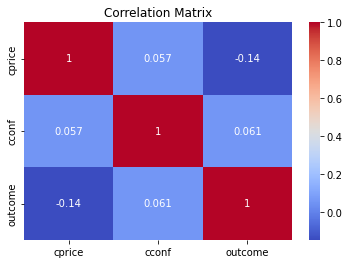

In [569]:
import seaborn as sns
corr_matrix = df[['cprice', 'cconf', 'outcome']].corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [570]:
#df['employees'].hist()

In [571]:
#scaling numerical variables
from sklearn.preprocessing import StandardScaler

# Copying original dataframe (train)
df3 = df.copy()

scaler = StandardScaler()
num_cols = ['age','ccontact','lcdays',  'pcontact', 'cprice', 'cconf']
df3[num_cols] = scaler.fit_transform(df3[num_cols])

df3.head()

,age,job,civil,edu,hloan,ploan,ctype,month,day,ccontact,lcdays,pcontact,presult,cprice,cconf,outcome
0,-0.775010,technician,married,university,yes,no,cellular,jul,thu,1.591286,-0.165117,-0.351026,nonexistent,0.593418,-0.474561,0
1,-1.254577,services,single,School,no,no,telephone,may,mon,-0.206723,-0.165117,-0.351026,nonexistent,0.724637,0.882399,0
2,1.622829,services,divorced,unknown,no,no,cellular,may,fri,0.512481,-0.165117,-0.351026,nonexistent,-1.176315,-1.228427,0
3,0.184126,entrepreneur,married,university,no,no,telephone,may,mon,-0.566325,-0.165117,-0.351026,nonexistent,0.724637,0.882399,0
4,0.855520,technician,married,apprenticeship,no,yes,telephone,jun,thu,-0.566325,-0.165117,-0.351026,nonexistent,1.537851,-0.280709,0


In [572]:
#scaling numerical variables in TEST Data
from sklearn.preprocessing import StandardScaler

# Copying original dataframe (test)
df4 = df2.copy()

#scaler = StandardScaler()
num_cols = ['age','ccontact','lcdays',  'pcontact', 'cprice', 'cconf']
df4[num_cols] = scaler.fit_transform(df4[num_cols])

df4.head()

,age,job,civil,edu,hloan,ploan,ctype,month,day,ccontact,lcdays,pcontact,presult,cprice,cconf
0,0.490674,services,married,School,no,no,telephone,may,mon,-0.565018,-0.161439,-0.346483,nonexistent,0.718263,0.89603
1,0.106370,artisan,married,unknown,no,no,telephone,may,mon,-0.565018,-0.161439,-0.346483,nonexistent,0.718263,0.89603
2,0.106370,artisan,married,unknown,no,no,telephone,may,mon,-0.565018,-0.161439,-0.346483,nonexistent,0.718263,0.89603
3,1.355359,retired,married,School,yes,yes,telephone,may,mon,-0.565018,-0.161439,-0.346483,nonexistent,0.718263,0.89603
4,-0.950466,unemployed,married,School,no,no,telephone,may,mon,-0.565018,-0.161439,-0.346483,nonexistent,0.718263,0.89603


In [573]:
#creating dummy variables on TRAIN data
model_df = pd.get_dummies(df3,drop_first=True)

In [574]:
model_df.shape

(28831, 45)

In [575]:
#creating dummy variables on TEST data
model_df2 = pd.get_dummies(df4,drop_first=True)

In [576]:
model_df2

,age,ccontact,lcdays,pcontact,cprice,cconf,job_artisan,job_entrepreneur,job_housemaid,job_management,...,month_may,month_nov,month_oct,month_sep,day_mon,day_thu,day_tue,day_wed,presult_nonexistent,presult_success
0,0.490674,-0.565018,-0.161439,-0.346483,0.718263,0.896030,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1,0.106370,-0.565018,-0.161439,-0.346483,0.718263,0.896030,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,0.106370,-0.565018,-0.161439,-0.346483,0.718263,0.896030,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,1.355359,-0.565018,-0.161439,-0.346483,0.718263,0.896030,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,-0.950466,-0.565018,-0.161439,-0.346483,0.718263,0.896030,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,-0.181858,-0.200636,-0.161439,-0.346483,2.055628,-2.238566,0,0,1,0,...,0,1,0,0,0,0,0,1,1,0
12353,-0.758314,0.163746,-0.161439,-0.346483,2.055628,-2.238566,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
12354,2.123968,-0.565018,0.603477,11.335609,2.055628,-2.238566,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
12355,2.123968,-0.200636,4.428060,5.494563,2.055628,-2.238566,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


In [577]:
model_df2.shape

(12357, 44)

In [578]:
model_df.head()

,age,ccontact,lcdays,pcontact,cprice,cconf,outcome,job_artisan,job_entrepreneur,job_housemaid,...,month_may,month_nov,month_oct,month_sep,day_mon,day_thu,day_tue,day_wed,presult_nonexistent,presult_success
0,-0.775010,1.591286,-0.165117,-0.351026,0.593418,-0.474561,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,-1.254577,-0.206723,-0.165117,-0.351026,0.724637,0.882399,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1.622829,0.512481,-0.165117,-0.351026,-1.176315,-1.228427,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0.184126,-0.566325,-0.165117,-0.351026,0.724637,0.882399,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,0.855520,-0.566325,-0.165117,-0.351026,1.537851,-0.280709,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [579]:
model_df.shape

(28831, 45)

In [580]:
model_df.columns

Index(['age', 'ccontact', 'lcdays', 'pcontact', 'cprice', 'cconf', 'outcome',
       'job_artisan', 'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_selfemployed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'civil_married',
       'civil_single', 'civil_unknown', 'edu_apprenticeship', 'edu_illiterate',
       'edu_university', 'edu_unknown', 'hloan_unknown', 'hloan_yes',
       'ploan_unknown', 'ploan_yes', 'ctype_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_mon', 'day_thu', 'day_tue',
       'day_wed', 'presult_nonexistent', 'presult_success'],
      dtype='object')

In [581]:
model_df = model_df.drop(['job_unknown','civil_unknown','edu_unknown','ploan_unknown'],axis=1)

In [582]:
model_df.shape

(28831, 41)

In [583]:
model_df2 = model_df2.drop(['job_unknown','civil_unknown','edu_unknown','ploan_unknown'],axis=1)

In [584]:
model_df2.shape

(12357, 40)

In [585]:
X = model_df.drop('outcome' , axis=1)
y = model_df['outcome']

In [586]:
#SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['outcome'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['outcome']==0]))
print("Number of subscription",len(os_data_y[os_data_y['outcome']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['outcome']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['outcome']==1])/len(os_data_X))

length of oversampled data is  35814
Number of no subscription in oversampled data 17907
Number of subscription 17907
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [587]:
type(X)

pandas.core.frame.DataFrame

In [588]:
type(y)

pandas.core.series.Series

In [589]:
#Steps done till now
#Month,day,credit columns dropped from TEST and TRAIN

#Used standard scarler to scale numerical values 

#Used get dummies to make dummy variables 

#Split data into test and train 

In [590]:
import warnings
warnings.filterwarnings("ignore")

#Model Implementation KNN

In [591]:
#KNN Algorith
#from sklearn.neighbors import KNeighborsClassifier
#knn=KNeighborsClassifier(n_neighbors=5)

In [592]:
#knn.fit(X_train,y_train)
#y_pred = knn.predict_proba(X_test)

In [593]:
#score = knn.score(X_test, y_test)
#score

In [594]:
##predict on TEST Data
#y_pred = knn.predict_proba(model_df2)


In [595]:
#y_pred

In [596]:
#values of only class 1 
#y_pred[:, 1]

In [597]:
#answers_knn14 = pd.DataFrame()
#answers_knn14['id'] = df2['id']
#answers_knn14['outcome'] = y_pred[:, 1]
#answers_knn14.to_csv('knn14.csv', index=False)

In [598]:
# 54% on kaggle  with k = 7

#KNN ENDS

In [599]:
#Importing different models

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

#LOG R STARTS

In [600]:
# Logistic Regression
#logr = LogisticRegression(random_state=0)
#param_grid_logreg = {'C': np.logspace(-4, 4, 20),
 #                    'penalty' : ['l1', 'l2']}
#logr_cv = GridSearchCV(logr, param_grid_logreg)



#logr_cv.fit(X_train, y_train.values.ravel())
#print('Logistic Regression')
#print("tuned hpyerparameters :(best parameters) ", logr_cv.best_params_)
#print("best score of training set :", round(logr_cv.best_score_, 3))


In [601]:
#score = logr_cv.score(X_test, y_test)
#score

In [602]:
#Predict on TEST Data
#y_pred_logr = logr_cv.predict(model_df2)

In [603]:
#y_pred_logr

In [604]:
#writing answers to a new file
#answers_logr_smote = pd.DataFrame()
#answers_logr_smote['id'] = df_copy['id']
#answers_logr_smote['outcome'] = y_pred_logr[:, 1]
#answers_logr_smote.to_csv('logr.csv', index=False)

In [605]:
# 49 % on kaggle (with and wihtout smote)

# LOG R ENDS

#SVM STARTS

In [606]:
#SVM
#from sklearn import svm as classifier
#model_SVM = classifier.SVC(probability=True)
#model_SVM.fit(X_train, y_train)
#y_pred_SVM = model_SVM.predict(X_test)

In [607]:
#y_pred_SVM = model_SVM.predict_proba(model_df2)

In [608]:
#score = model_SVM.score(X_test, y_test)
#score

In [609]:
#writing answers to a new file
#answers_SVM_SMOTE = pd.DataFrame()
#answers_SVM_SMOTE['id'] = df_copy['id']
#answers_SVM_SMOTE['outcome'] = y_pred_SVM[:, 1]
#answers_SVM_SMOTE.to_csv('answers_SVM_SMOTE.csv', index=False)

In [610]:
#51 % ON KAGGLE WITH SMOTE

#SVM ENDS

In [611]:
#Decision Tree starts

In [612]:
from sklearn import tree

# Building Decision Tree model 
#dtc = tree.DecisionTreeClassifier(random_state=0)
#dtc.fit(X_train, y_train)

In [613]:
#score = dtc.score(X_test, y_test)
#score

In [614]:
#y_pred4 = dtc.predict_proba(model_df2)

In [615]:
#y_pred4


In [616]:
#answers_TREE = pd.DataFrame()
#answers_TREE['id'] = df2['id']
#answers_TREE['outcome'] = y_pred4[:, 1]
#answers_TREE.to_csv('TREE.csv', index=False)

In [617]:
#Decision tree ends

# RANDOM FOREST BEGINS

In [618]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(random_state=0,max_depth=20,min_samples_leaf= 2,n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=50,
                       random_state=0)

In [619]:
score = rf.score(X_test, y_test)
score

0.901849710982659

In [620]:
score = rf.score(X_train, y_train)
score

0.9335018086318815

In [621]:
y_pred5 = rf.predict_proba(model_df2)
y_pred5


array([[0.97354337, 0.02645663],
       [0.96845208, 0.03154792],
       [0.96845208, 0.03154792],
       ...,
       [0.46616989, 0.53383011],
       [0.30229437, 0.69770563],
       [0.58125949, 0.41874051]])

In [622]:
from sklearn.metrics import roc_curve, auc

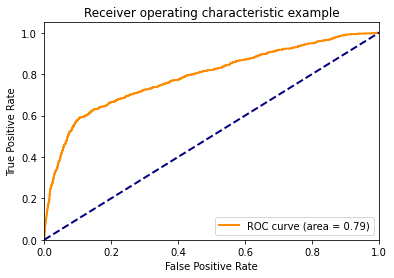

In [623]:
score_Y_dt = rf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, score_Y_dt[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [624]:
Team9Sub1_YS = pd.DataFrame()
Team9Sub1_YS['id'] = df_copy['id']
Team9Sub1_YS['outcome'] = y_pred5[:, 1]
Team9Sub1_YS.to_csv('Team9Sub1_YS.csv', index=False)

In [625]:
#78 % on kaggle (WITH AND WITHOUT SMOTE)

In [626]:
# Naive Bayes

#from sklearn.naive_bayes import GaussianNB

# Building Naive Bayes model 
#nb = GaussianNB()
#nb.fit(X_train, y_train)

In [627]:
#score = nb.score(X_test, y_test)
#score

In [628]:
#Improving randomforest
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'n_estimators': [10, 20, 50, 60, 80]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 60}